In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append('../../')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
from langdetect import detect
from tqdm.notebook import tqdm_notebook as tqdm

from comscore_task.settings import DATASETS_DIR

tqdm.pandas()

## Train data analysis

In [2]:
df = pd.read_parquet(DATASETS_DIR / 'train_data.parquet')

In [3]:
df.describe()

,brand_id,post_content,platform
count,77873,77873,77873
unique,25881,75159,2
top,2bc1167da7414fada27ec5e69f0187a6,,TW
freq,621,346,40000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77873 entries, 0 to 77872
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand_id      77873 non-null  object
 1   post_content  77873 non-null  object
 2   platform      77873 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


In [29]:
with pd.option_context('display.max_colwidth', None):
    display(df.head(20))

,brand_id,post_content,platform,length,hashtags_cnt
0,9b39285ec9cf47baaa51d1ea18eec8cc,#LoSéTodo La violación a la intimidad tiene consecuencias.,FB,8,1
1,18cbba7c95b741e9bb477778c5cce568,Whoopi Goldberg apologizes after saying the Holocaust 'isn't about race' on 'The View',FB,13,0
2,a63ceb8f478e43938416f2a9a1c5bacd,"Nochevieja se llama Hogmanay en Escocia y la mañana siguiente se celebra el Loony Dook. Desde 1987, personas disfrazadas se adentran en el mar helado como una forma alternativa de superar los excesos y seguirse divirtiendo.\n#Cambridge #NewYear #Vocabulary #BritishCulture",TW,40,4
3,acbba767a3854bd3b324da5a1c896fe6,Kiss my to welcome in the New Years and finger my cunt. Happy New Years my love...,TW,17,0
4,0dc1b14b735e47c5861dc8238bb218e0,"— Hiding in plain sight on a dusty corner of this remote west Texas town, the Blackwell School stands as a lasting reminder of what Mexican American students endured during decades of segregation.\n“I learned about racism here in Marfa,” said Jessi Silva, 73, who attended the school as a child in the 1950s and 1960s.",FB,56,0
5,9d6db0bc78c74dd682d843ffe138783b,"Graham column: ABC News offered their ""first draft of history"" on 2021. It saves Biden's bacon.",TW,16,0
6,49f75fd37d8b45ad92e49a0697d52045,¡#FelizAñoNuevo a todos! Que este nuevo año venga acompañado de unión familiar y amor para cada uno de nosotros. ❤️🥳,TW,20,1
7,d43a49f7ae674412b6ed00c96bceb115,"From top chefs to pop stars, there’s something for everyone in Las Vegas this week.",TW,15,0
8,03cc8bf96862403fb55daee71f2ba3e9,आठ सन्तानकी आमाको घाँटीमा किन र कसले बाँध्यो साङ्लो? \nhttps://bbc.in/3s5jqGM,FB,10,0
9,3d23ca8f6165497f932bb329ebcd1ab7,Ok!,TW,1,0


In [30]:
with pd.option_context('display.max_colwidth', None):
    display(df[df.platform == 'FB'].head(20))

,brand_id,post_content,platform,length,hashtags_cnt
0,9b39285ec9cf47baaa51d1ea18eec8cc,#LoSéTodo La violación a la intimidad tiene consecuencias.,FB,8,1
1,18cbba7c95b741e9bb477778c5cce568,Whoopi Goldberg apologizes after saying the Holocaust 'isn't about race' on 'The View',FB,13,0
4,0dc1b14b735e47c5861dc8238bb218e0,"— Hiding in plain sight on a dusty corner of this remote west Texas town, the Blackwell School stands as a lasting reminder of what Mexican American students endured during decades of segregation.\n“I learned about racism here in Marfa,” said Jessi Silva, 73, who attended the school as a child in the 1950s and 1960s.",FB,56,0
8,03cc8bf96862403fb55daee71f2ba3e9,आठ सन्तानकी आमाको घाँटीमा किन र कसले बाँध्यो साङ्लो? \nhttps://bbc.in/3s5jqGM,FB,10,0
14,bd567dff3c384d9b897eeeea467952e1,"""Yet a former president of the United States, Donald Trump, just spoke admiring words about Putin’s invasion,"" writes Tulsa resident Richard Eagleton.",FB,22,0
16,e8c01ca614d84dc185cfc0d5d541f1d2,"Becaria y becario de Educación #MediaSuperior👩‍🎓🧑‍🎓, ¿cobras tu beca en la app de #BienestarAzteca?📱\n\n¡Te compartimos este decálogo de seguridad🔒 para proteger tus datos y tu beca de personas malintencionadas!\n\nEntra a 👉 bit.ly/DecálogoDeSeguridadMediaSuperior",FB,34,2
17,045e22fb3dec46caa8e14cba191f75ff,Because parent hangovers should come with a survival guide... 😩,FB,10,0
18,a756ba50ffa34a0cbdf49f5b4e683c1d,Machine Gun Kelly's been using TikTok to drop some upcoming music bombshells!,FB,12,0
20,b7cc6c31fedd42dd9134e3f5144f200c,Geauga Park District holding two programs for youths https://trib.al/LerIUTp,FB,9,0
22,203fbfd3508b42d499130b74549e1b05,Mit Mähwerken samt Aufbereiter und Schlegelmulchern wird dieser Krone BigM 2 zum Verkauf angeboten. Die Maschine kommt aus dem Jahr 2006 und kann unter diesem Link gefunden werden:\n► https://www.traktorpool.de/details/Maehwerke/Krone-BIG-M-2/6549235/,FB,30,0


In [31]:
with pd.option_context('display.max_colwidth', None):
    display(df[df.platform == 'TW'].head(20))

,brand_id,post_content,platform,length,hashtags_cnt
2,a63ceb8f478e43938416f2a9a1c5bacd,"Nochevieja se llama Hogmanay en Escocia y la mañana siguiente se celebra el Loony Dook. Desde 1987, personas disfrazadas se adentran en el mar helado como una forma alternativa de superar los excesos y seguirse divirtiendo.\n#Cambridge #NewYear #Vocabulary #BritishCulture",TW,40,4
3,acbba767a3854bd3b324da5a1c896fe6,Kiss my to welcome in the New Years and finger my cunt. Happy New Years my love...,TW,17,0
5,9d6db0bc78c74dd682d843ffe138783b,"Graham column: ABC News offered their ""first draft of history"" on 2021. It saves Biden's bacon.",TW,16,0
6,49f75fd37d8b45ad92e49a0697d52045,¡#FelizAñoNuevo a todos! Que este nuevo año venga acompañado de unión familiar y amor para cada uno de nosotros. ❤️🥳,TW,20,1
7,d43a49f7ae674412b6ed00c96bceb115,"From top chefs to pop stars, there’s something for everyone in Las Vegas this week.",TW,15,0
9,3d23ca8f6165497f932bb329ebcd1ab7,Ok!,TW,1,0
10,d09462e953d6497fa378dcd543662aeb,"From an arrest in a 25-year-old missing persons case to a fatal shark attack and the continuing twists and turns of the COVID-19 pandemic, there were plenty of stories to keep Central Coast viewers' attention during 2021\n",TW,37,0
11,81a9c548d781412993dc915680e21679,Now playing: Life and Breadth by Seeds,TW,7,0
12,1c71e480f1844ff1b38d68863be245df,10:00 AM - Roads are becoming completely covered in south-central Iowa.,TW,11,0
13,52083ab3147f4a1d96454f18e144b4b1,Winter storm warnings and watches were in effect today after tens of thousands of people evacuated the Boulder suburbs from fast-moving wildfires.\n,TW,22,0


<AxesSubplot:>

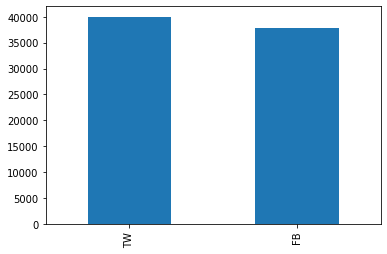

In [6]:
df.platform.value_counts().plot(kind='bar')

In [12]:
def detect_lang(text: str) -> str:
    try:
        language = detect(text)
    except:
        language = "unk"
    
    return language

df['lang'] = df.post_content.progress_apply(lambda x: detect_lang(x))

  0%|          | 0/77873 [00:00<?, ?it/s]

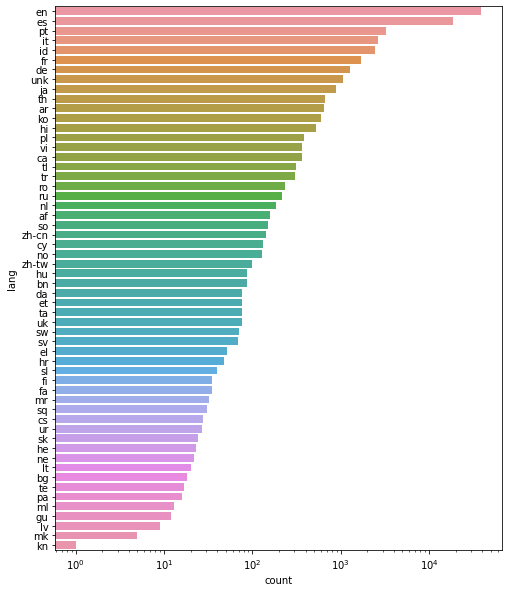

In [22]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.countplot(y='lang', data=df, ax=ax, order = df['lang'].value_counts().index)
ax.set_xscale('log')

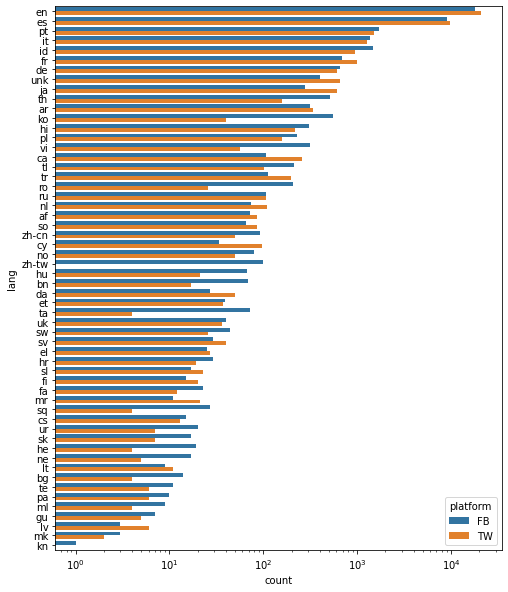

In [46]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.countplot(y='lang', data=df, ax=ax, hue='platform', order=df['lang'].value_counts().index)
ax.set_xscale('log')

Simple tokenization by whitesign.

In [7]:
df['length'] = df.post_content.apply(lambda t: len(t.split()))

In [16]:
df.describe()

,length,hashtags_cnt
count,77873.000000,77873.000000
mean,22.743852,0.616607
std,35.727069,1.676539
min,0.000000,0.000000
25%,10.000000,0.000000
50%,17.000000,0.000000
75%,27.000000,1.000000
max,2601.000000,35.000000


In [17]:
df.groupby('platform').describe()

length                                                       \
            count       mean        std  min   25%   50%   75%     max   
platform                                                                 
FB        37873.0  27.992052  49.424952  1.0  11.0  19.0  30.0  2601.0   
TW        40000.0  17.774725  11.013878  0.0  10.0  15.0  24.0    63.0   

         hashtags_cnt                                                
                count      mean       std  min  25%  50%  75%   max  
platform                                                             
FB            37873.0  0.686743  2.084756  0.0  0.0  0.0  0.0  35.0  
TW            40000.0  0.550200  1.161040  0.0  0.0  0.0  1.0  23.0

Facebook texts slightly longer.

<AxesSubplot:xlabel='length', ylabel='Count'>

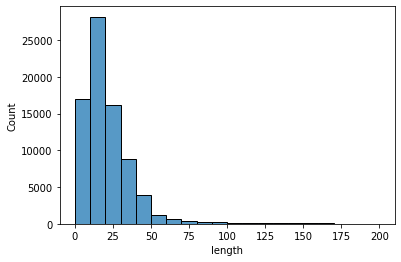

In [18]:
sns.histplot(data=df, x="length", binrange=(0, 200), bins=20)

<AxesSubplot:xlabel='length', ylabel='Count'>

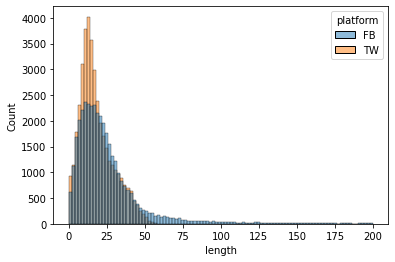

In [11]:
sns.histplot(data=df, x="length", hue='platform', binrange=(0, 200), bins=100)

<AxesSubplot:xlabel='length', ylabel='platform'>

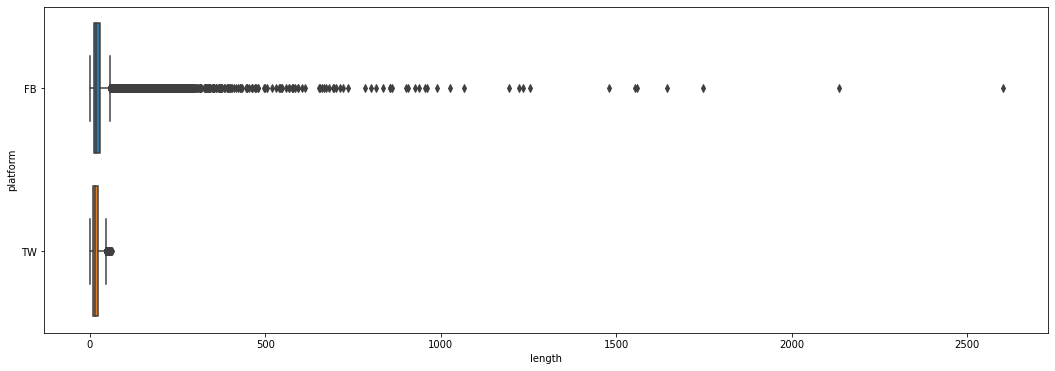

In [12]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxplot(data=df, x='length', y='platform', ax=ax)

In [15]:
pattern = r"#(\w+)"
df['hashtags_cnt'] = df.post_content.apply(lambda t: len(re.findall(pattern, t)))

<AxesSubplot:xlabel='hashtags_cnt', ylabel='Count'>

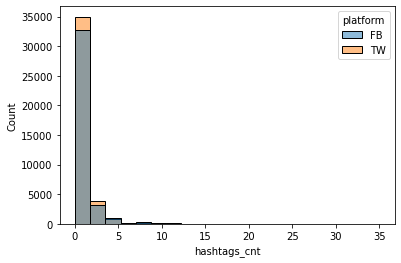

In [23]:
sns.histplot(data=df, x="hashtags_cnt", hue='platform', bins=20)

# Val data

In [ ]:
val_df = pd.read_parquet(DATASETS_DIR / 'val_data_post_content.parquet')
val_target_df = pd.read_parquet(DATASETS_DIR / 'val_data_platform.parquet')